In [1]:
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 

from numpy import sqrt 


In [2]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Sun Pics Part 2 (10 pics)\*')

In [3]:
data_average = [] 
data_median = [] 
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata)) 

In [4]:
Arr=np.array(data_average)

In [5]:
#For this I want to know how to create a loop for the difference
Diff = Arr[2] - Arr[1]

In [6]:
#To look how Diff would look like
#Diff

In [7]:
Diff = [] 
for i in range (1,len(Arr)-1): 
    Diff.append(Arr[i+1]-Arr[i])

In [8]:
#Just a plot for the Difference from the start

#plt.figure(figsize=(10,10))
#plt.imshow(Diff[0],vmin = -1, vmax = 1)  
#plt.colorbar()
#plt.show()

In [9]:
#TrackPy Images 
f = tp.locate(Arr[0], 11,invert = False )

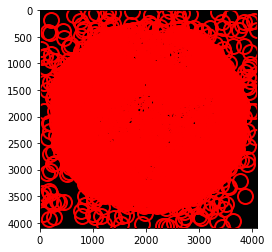

In [10]:
#like this because it is super bright
tp.annotate(f,Arr[0]);

In [11]:
#This is to clean up the graph  
#Talk to Milo about the limits of the minmass
f = tp.locate(Arr[0], 11, invert = True, minmass = 70)

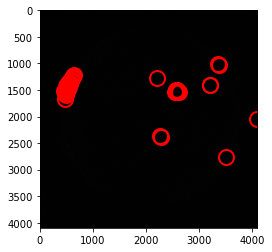

In [12]:
#This gives us the graph
tp.annotate(f,Arr[0]); 

In [13]:
#print(f)

In [14]:
#This is to find the specific  data for the one partical(easier to look at data)
f.iloc[34]

y           1504.197090
x           2591.875661
mass          75.525738
size           2.434594
ecc            0.321339
signal         4.395678
raw_mass   -1181.546494
ep            -0.089743
Name: 15440, dtype: float64

In [15]:
#Just created an array for the original radius of the sun. 
R = 1625.691406

In [16]:
#Use trackPy/Sunpy and look at the header for the new dimentions of the  
#Diagram, with this we can use restrictions and track the partical

In [17]:
#Tells us the frames and features of the photos
r = tp.batch(Arr[:10],11,minmass = 50, invert = True); 


Frame 9: 139 features


In [18]:
# The 5 here is the max displacement that the partical can trael 
#This tends to be small so it dosnet slow down the program  
#memeory means the amount of frames that the partical can be missed 
#this is useful to give us the partical within the header
t = tp.link(r,5,memory = 9)

Frame 9: 139 trajectories present.


In [19]:
t.head 

<bound method NDFrame.head of                 y            x        mass      size       ecc    signal  \
0      692.731343  1109.121269   53.547349  2.945082  0.338276  2.197839   
100   1587.005459   497.195415   91.510021  2.855700  0.061035  3.496562   
98    1573.733840  3641.583650   52.548331  2.865489  0.471381  2.297741   
97    1570.725694  2568.932292   57.543419  3.121665  0.489026  2.397642   
96    1568.801406  2592.922671   56.844107  3.060319  0.108850  2.297741   
...           ...          ...         ...       ...       ...       ...   
1185  1404.645594  3190.159004   62.195084  2.969836  0.115198  2.382953   
1186  1405.854271   555.134243  165.972704  2.896640  0.289998  6.314826   
1187  1408.572741   515.320061   77.803428  3.265674  0.460669  3.336135   
1181  1383.453382   534.937843   65.173775  3.030919  0.374255  3.931873   
1277  3490.807175  2745.547085   53.139861  3.147353  0.315110  1.668067   

         raw_mass        ep  frame  particle  
0     -142

In [20]:
#This code with (t,5) filters out the particals that are spontanious 
#Will have to look at the data to see what frames are considered spontanious
t1 = tp.filter_stubs(t,5) 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 549
After: 66


plt.figure()
tp.mass_size(t1.groupby('particle').mean());

In [21]:
#Plots those figures mass and size (Not important as of now)
#plt.figure()
#tp.mass_size(t1.groupby('particle').mean())

In [22]:
#This cell will be for the code to filter out the particals that are not needed 
t2 = t1[((t1['mass'] >60 ) & (t1['size'] < 3.1) &
         (t1['ecc'] < 1))]

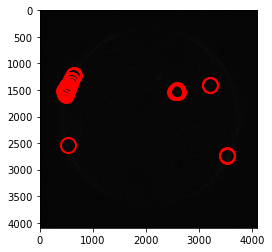

In [23]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], Arr[1]);

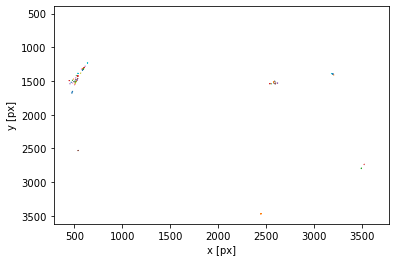

In [24]:
plt.figure()
tp.plot_traj(t2); 

In [25]:
#This is a equation for the radius of the particals INSIDE of the Circle 
iloc_valid = []

for i in range(len(f)): 
    r = np.sqrt((t['x'].iloc[i]- 2070.828369)**2 + (t['y'].iloc[i] - 2008.760620)**2)
    if r<R: 
        print(r, t['particle'].iloc[i])
        iloc_valid.append(i)
    else: 
        print ('Not Important') 

    

Not Important
Not Important
Not Important
663.3114756902536 3
682.7492735659819 4
Not Important
664.4099873021468 6
Not Important
700.9001853826223 8
Not Important
Not Important
712.8603918898916 11
674.5308589124434 12
664.4477202783263 13
Not Important
673.7017349801447 15
Not Important
727.0843278975366 17
714.4315619080177 18
Not Important
702.7959270937081 20
Not Important
694.6035245764971 22
Not Important
Not Important
Not Important
711.6682277237475 26
Not Important
Not Important
707.0836079331443 29
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
Not Important
1589.5808747957453 46
1601.6253806937223 47
1622.3342290833543 48
Not Important
Not Important
1603.865117646188 51
Not Important
Not Important
Not Important
1623.4419812767803 55
Not Important
1619.920029387272 57


In [39]:
#The particals # that are valid from the loop in top
iloc_valid

[3, 4, 6, 8, 11, 12, 13, 15, 17, 18, 20, 22, 26, 29, 46, 47, 48, 51, 55, 57]

In [34]:
type(iloc_valid)

list

In [41]:
df = pd.DataFrame()

In [70]:
type(df1)

pandas.core.frame.DataFrame

In [58]:
df1 = df.iloc[:,]

In [68]:
tp.annotate (df1[i],Arr[1]);

KeyError: 57

In [29]:
#Next code is for graphing the light waves
# Using mathplotlib but package is LightCurve

In [30]:
#import lightcurve 

In [31]:
#This is the tedious stuff jsut sub in the stuff for my data

#fig = plt.figure(figsize=(15, 5))
#ax = fig.add_subplot(1, 1, 1)

#datasets = glob.glob('data/lc1v?????_x1d.fits')
#datasets.sort()

#for item in datasets:
    #hdu = fits.open(item)
    #ax.plot(hdu[1].data['wavelength'].ravel(), hdu[1].data['flux'].ravel())
    
#ax.set_ylim(0, 3e-14)
#ax.set_xlim(1000, 2200)
#ax.set_xlabel('Wavelength')
#ax.set_ylabel('Flux')
#ax.set_title('Dispersed spectra from 4 sequential datasets')